# Code for Formal report 2: Ballistics

Integrating [6]

In [1]:
import sympy as sy
u, uT, vz = sy.symbols('u, uT, vz')
sy.integrate((uT**(2))/(u**(2)-uT**(2)), (u, 0, vz))

-uT*(log(-uT)/2 - log(uT)/2) + uT*(log(-uT + vz)/2 - log(uT + vz)/2)

In [2]:
sy.simplify(_)

uT*(-log(-uT) + log(uT) + log(-uT + vz) - log(uT + vz))/2

making $v_{z}$ the subject of the equation

In [3]:
import sympy as sy
u,uT,vz=sy.symbols('u,uT,vz')
gt=sy.symbols('gt')
eq=(1/2)*uT*sy.ln(uT-vz)-(1/2)*uT*sy.ln(uT+vz)-gt
sy.solve(eq, vz)

[-uT*tanh(0.5*log(exp(2.0*gt))/uT)]

Integrating with respect to time

In [4]:
import sympy as sy
uT, g, t = sy.symbols('uT, g, t')
sy.integrate(-1*uT*sy.tanh((g*t)/(uT)), (t, 0, t))

Piecewise((-uT*(t - uT*log(tanh(g*t/uT) + 1)/g), (g > -oo) & (g < oo) & Ne(g, 0)), (0, True))

This can be simplified into: $$z=z_{0} - \frac{u_{T}^2}{g}ln cosh(\frac{g}{u_{T}})(8)$$Where $z_{0}$ is the initial position of the cannonball.

Creating the graphs of velocity over time

In [5]:
import sympy as sy

uT, u, vz, g, t=sy.symbols('uT, u, vz, g,t')
def f(t):
    return -1*uT*sy.tanh((g*t)/(uT))

print (f(1))
print (f(10))
print (f(50))
print (f(100))

-uT*tanh(g/uT)
-uT*tanh(10*g/uT)
-uT*tanh(50*g/uT)
-uT*tanh(100*g/uT)


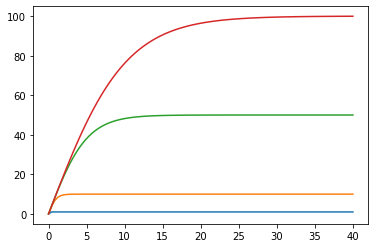

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0, 40, 100)

plt.plot(x, 1*np.tanh(10*x/1), label= "uT=1")
plt.plot(x, 10*np.tanh(10*x/10), label = "ut=10")
plt.plot(x, 50*np.tanh(10*x/50), label= "uT=50")
plt.plot(x, 100*np.tanh(10*x/100), label = "uT=100")

# Calculating the Effect of Drag on a Dropped Cannonball

Finding the time it takes for the cannonball to drop under the effect of air resistance

In [8]:
import sympy as sy
uT, z0, g, t =sy.symbols('uT,z0,g,t')
g=10
uT=100
z0=500
eq=z0-(uT**2/g)*sy.log(sy.cosh(g*t/uT))
sy.solve(eq, t)

[-10.8503850194839, 10.8503850194839]

Finding the time it takes for the cannonball to drop in free fall

In [ ]:
import sympy as sy
z0, g, t=sy.symbols('z0,g,t')
g=10
z0=500
eq=(g*t**2)/2 -z0
sy.solve(eq, t)

## Section 2: Numerical Analysis on the Role of Drag
## Part A: Numerical Study of the Role of Drag on a Dropped Cannonball

Creating the graphs of t over Z and t over vZ

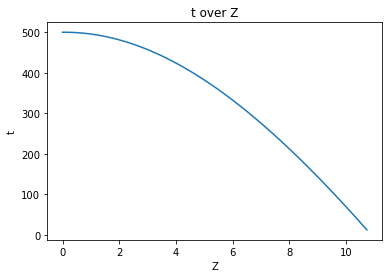

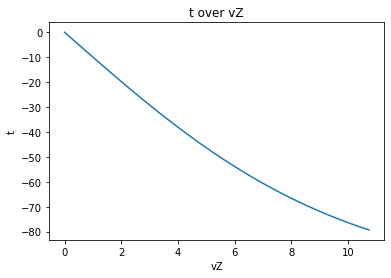

In [9]:
import numpy as np
import matplotlib.pyplot as plt


N=100
t=10.85
uT=100
g=10
dt=t/N

t = np.arange(0, t ,dt)
Z = np.zeros(N)
Z[0]=500
vZ = np.zeros(N)
vZ[0]= 0

for i in range(0,N-1):
    Z[i+1]=Z[i]+dt*vZ[i]
    vZ[i+1]=vZ[i]+dt*(-g-(g/uT**2)*np.sqrt(vZ[i]**(2))*vZ[i])
plt.plot(t, Z)
plt.xlabel('Z')
plt.ylabel('t')
plt.title('t over Z')
plt.figure()
plt.xlabel('vZ')
plt.ylabel('t')
plt.title('t over vZ')
plt.plot(t, vZ)
     
         
         


Creating the "dt over error" graph

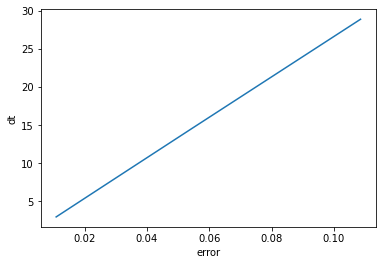

In [10]:
import numpy as np
import matplotlib.pyplot as plt
t=10.85
def f(N):
    t=10.85
    uT=100
    g=10
    dt=t/N
    t = np.arange(0, t ,dt)
    Z = np.zeros(N)
    Z[0]=500
    vZ = np.zeros(N)
    vZ[0]= 0

    for i in range(0,N-1):
        Z[i+1]=Z[i]+dt*vZ[i]
        vZ[i+1]=vZ[i]+dt*(-g-(g/uT**2)*np.sqrt(vZ[i]**(2))*vZ[i])
    return Z[i-1]

n=np.arange(100,1001,100)
error=[f(n[0]),f(n[1]),f(n[2]),f(n[3]),f(n[4]),f(n[5]),f(n[6]),f(n[7]),f(n[8]),f(n[9])]
plt.plot(t/n, error)
plt.xlabel('error')
plt.ylabel('dt')
plt.show()

# Part B:  Numerical Study of the Role of Drag on a Launched Cannonball
## Introduction

Finding time of flight and x distance

15.0
221.12850097807026


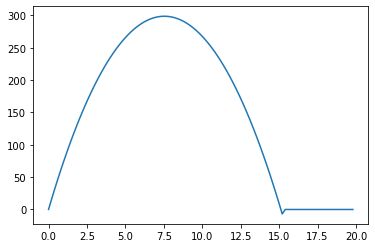

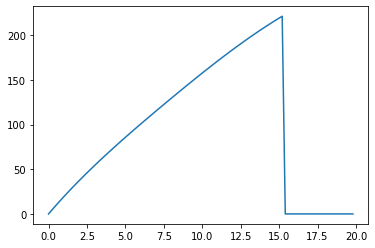

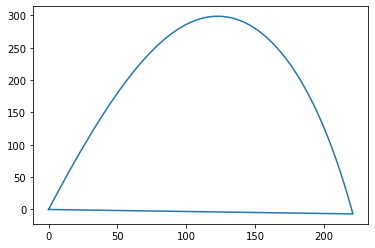

In [11]:
import numpy as np

N=100
uT=100
g=10
t=20
dt=t/N
t = np.arange(0, t ,dt)
vX=np.zeros(N)
vX[0]=20
vZ=np.zeros(N)
vZ[0]=80
Z=np.zeros(N)
Z[0]=0
X=np.zeros(N)
X[0]=0

for i in range(0,N-1):
    vX[i+1]=vX[i]+dt*(-g/uT**2 *np.sqrt(vX[i]**2+vZ[i]**2)*vX[i])
    vZ[i+1]=vZ[i]+dt*(-g-g/uT**2 *np.sqrt(vX[i]**2+vZ[i]**2)*vX[i])
    Z[i+1]=Z[i]+dt*vZ[i]
    X[i+1]=X[i]+dt*vX[i]
    if Z[i+1]<0:
        print(dt*i)
        print(X[i+1])
        break
plt.plot(t, Z)
plt.figure()
plt.plot(t, X)
plt.figure()
plt.plot(X, Z)

Attempting to plot X over Z

In [ ]:
import numpy as np

N=100
uT=100
g=10
t=20
dt=t/N
t = np.arange(0, t ,dt)
vX=np.zeros(N)
vX[0]=500
vZ=np.zeros(N)
vZ[0]=1000
Z=np.zeros(N)
Z[0]=0
X=np.zeros(N)
X[0]=0

for i in range(0,N-1):
    vX[i+1]=vX[i]+dt*(-g/uT**2 *np.sqrt(vX[i]**2+vZ[i]**2)*vX[i])
    vZ[i+1]=vZ[i]+dt*(-g-g/uT**2 *np.sqrt(vX[i]**2+vZ[i]**2)*vX[i])
    Z[i+1]=Z[i]+dt*vZ[i]
    X[i+1]=X[i]+dt*vX[i]
    if Z[i+1]<0:
        print(Z[i+1])
        print(dt*i)
        print(X[i+1])
        break
plt.plot(X, Z)

## Part C:  Predict the Landing Point of a Cannonball

Attempting to create the relevant graphs

In [ ]:
import numpy as np
import math

N=6
uT=100
g=10
t=200
dt=t/N
t = np.arange(0, t ,dt)
vX=np.zeros(N)
vX[0]=20
vZ=np.zeros(N)
vZ[0]=80
vM1=vX/math.cos(0)
vM2=vX/math.cos(math.pi/10)
vM3=vX/math.cos(math.pi/5)
vM4=vX/math.cos(3*math.pi/10)
vM5=vX/math.cos(2*math.pi/5)
vM6=vX/math.cos(math.pi/2)
Z=np.zeros(N)
Z[0]=0
X=np.zeros(N)
X[0]=0

for i in range(0,N-1):
    vZ[i+1]=vZ[i]+dt*(-g-g/uT**2 *np.sqrt(vX[i]**2+vZ[i]**2)*vX[i])
    X[i+1]=X[i]+dt*vX[i]
    if X[i+1]<0:
        print(dt*i)
        print(X[i+1])
        break
plt.plot(vM1, X)
plt.plot(vM2, X)
plt.plot(vM3, X)
plt.plot(vM4, X)
plt.plot(vM5, X)
plt.plot(vM6, X)

Attempting to find the angle $\theta$

In [ ]:
import sympy as sy
import math
j, vx = sy.symbols('j, vx')
vz=20
j=math.acos(vx/vz)
sy.solve(j)